# Analisi dati preliminare, 18 maggio 2022
La funzione del plot è $$V_H = \frac{iB}{wen}\tag{1}$$

Misura del numero di portatori di carica: vogliamo ottenere una misura di $n$, quindi ci serve sapere 

In [9]:
import ROOT as root
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



In [10]:
_file0 = open('../dati/data_dump_CHEPALLE.txt')

#full[2]

M=12
N=100

BPOS_V_gen_lo = np.zeros((12,100))
BPOS_V_gen_hi = np.zeros((12,100))
BPOS_V_out_lo = np.zeros((12,100))
BPOS_V_out_hi = np.zeros((12,100))

BNEG_V_gen_lo = np.zeros((12,100))
BNEG_V_gen_hi = np.zeros((12,100))
BNEG_V_out_lo = np.zeros((12,100))
BNEG_V_out_hi = np.zeros((12,100))

_file0.readline()#run
_file0.readline()#bpos
for i in range(M):
    _file0.readline()#cyclestart
    _file0.readline()#i:0
    for j in range(N):
        BPOS_V_gen_hi[i][j] = np.float64(_file0.readline())
        BPOS_V_out_hi[i][j] = np.float64(_file0.readline())
        BPOS_V_gen_lo[i][j] = np.float64(_file0.readline())
        BPOS_V_out_lo[i][j] = np.float64(_file0.readline())
    _file0.readline()

_file0.readline()
_file0.readline()#bneg
for i in range(M):
    _file0.readline()#cyclestart
    _file0.readline()#i:0
    for j in range(N):
        BNEG_V_gen_hi[i][j] = np.float64(_file0.readline())
        BNEG_V_out_hi[i][j] = np.float64(_file0.readline())
        BNEG_V_gen_lo[i][j] = np.float64(_file0.readline())
        BNEG_V_out_lo[i][j] = np.float64(_file0.readline())
    _file0.readline()
            

        
## Avg

BPOS_V_gen_lo_avg = np.array([BPOS_V_gen_lo[i].mean() for i in range(M)])
BPOS_V_gen_hi_avg = np.array([BPOS_V_gen_hi[i].mean() for i in range(M)])
BPOS_V_out_lo_avg = np.array([BPOS_V_out_lo[i].mean() for i in range(M)])
BPOS_V_out_hi_avg = np.array([BPOS_V_out_hi[i].mean() for i in range(M)])

BNEG_V_gen_lo_avg = np.array([BNEG_V_gen_lo[i].mean() for i in range(M)])
BNEG_V_gen_hi_avg = np.array([BNEG_V_gen_hi[i].mean() for i in range(M)])
BNEG_V_out_lo_avg = np.array([BNEG_V_out_lo[i].mean() for i in range(M)])
BNEG_V_out_hi_avg = np.array([BNEG_V_out_hi[i].mean() for i in range(M)])


## Std Dev

BPOS_V_gen_lo_std = np.array([BPOS_V_gen_lo[i].std() for i in range(M)])
BPOS_V_gen_hi_std = np.array([BPOS_V_gen_hi[i].std() for i in range(M)])
BPOS_V_out_lo_std = np.array([BPOS_V_out_lo[i].std() for i in range(M)])
BPOS_V_out_hi_std = np.array([BPOS_V_out_hi[i].std() for i in range(M)])

BNEG_V_gen_lo_std = np.array([BNEG_V_gen_lo[i].std() for i in range(M)])
BNEG_V_gen_hi_std = np.array([BNEG_V_gen_hi[i].std() for i in range(M)])
BNEG_V_out_lo_std = np.array([BNEG_V_out_lo[i].std() for i in range(M)])
BNEG_V_out_hi_std = np.array([BNEG_V_out_hi[i].std() for i in range(M)])

In [11]:

BPOS_V_gen = BPOS_V_gen_hi_avg-BPOS_V_gen_lo_avg
BPOS_V_out = BPOS_V_out_hi_avg-BPOS_V_out_lo_avg

BNEG_V_gen = BNEG_V_gen_hi_avg-BNEG_V_gen_lo_avg
BNEG_V_out = BNEG_V_out_hi_avg-BNEG_V_out_lo_avg

BPOS_V_gen_std = np.sqrt(BPOS_V_gen_hi_std**2 + BPOS_V_gen_lo_std**2)
BPOS_V_out_std = np.sqrt(BPOS_V_out_hi_std**2 + BPOS_V_out_lo_std**2)

BNEG_V_gen_std = np.sqrt(BNEG_V_gen_hi_std**2 + BNEG_V_gen_lo_std**2)
BNEG_V_out_std = np.sqrt(BNEG_V_out_hi_std**2 + BNEG_V_out_lo_std**2)

In [25]:
GVH = (BPOS_V_out+BNEG_V_out)/2
GVH_std = 0.5*np.sqrt(BPOS_V_out_std**2 + BNEG_V_out_std**2)

In [26]:
GVH, GVH_std

(array([0.33995601, 0.33594819, 0.3313783 , 0.32644183, 0.32192082,
        0.3173998 , 0.31361193, 0.30860215, 0.30422777, 0.29953568,
        0.29503909, 0.29081132]),
 array([0.00230275, 0.00253672, 0.00250748, 0.00252977, 0.0024646 ,
        0.00248619, 0.00236569, 0.00258141, 0.00271987, 0.0025126 ,
        0.00264912, 0.00256749]))

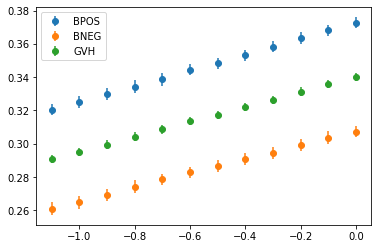

In [37]:
plt.errorbar(x=[-i/10 for i in range(12)], y=BPOS_V_out, yerr=BPOS_V_out_std,fmt='o', label='BPOS')
plt.errorbar(x=[-i/10 for i in range(12)], y=BNEG_V_out, yerr=BNEG_V_out_std,fmt='o', label='BNEG')
plt.errorbar(x=[-i/10 for i in range(12)], y=GVH, yerr=GVH_std,fmt='o', label='GVH')
plt.legend()

<ErrorbarContainer object of 3 artists>

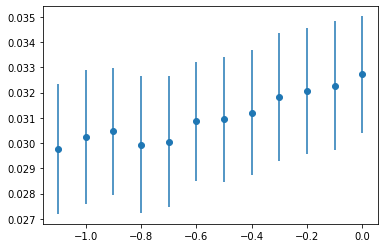

In [39]:
GVH_long = (BPOS_V_out-BNEG_V_out)/2
GVH_std_long = 0.5*np.sqrt(BPOS_V_out_std**2 + BNEG_V_out_std**2)

plt.errorbar(x=[-i/10 for i in range(12)], y=GVH_long, yerr=GVH_std_long,fmt='o')

**Domanda sui dati ottenuti**
Perchè i dati che abbiamo ottenuto non risultano essere positivi rispetto alle correnti? ricontrollare in che modo abbiamo raccolto le correnti per i campi magnetici BPOS e BNEG

### Possibile interpretazione fisica del fenomeno che si è osservato

Abbiamo impostato la corrente inizialmente a 1.3 A, poi abbiamo decrementato la corrente con DELTAI 0.1A, quindi passando in 12 punti da 1.3 (1.299 da lettura reale del display dello strumento) a 0.1 A finali. Abbiamo poi invertito i cavi, quindi la corrente è incrementata da 0.1 A a 1.3 A. 


Abbiamo quindi che in realtà i due array BPOS e BNEG dei valori di V_out vanno presi uno al contrario rispetto all'altro, ed inoltre i due riferimenti di corrente sono invertiti anche essi, nel primo caso da 1.3 a scendere fino a 0.1, nel secondo caso da 0.1 a salire fino a 1.3.


Domanda: l'elettromagnete utilizzato sfrutta un nucleo ferromagnetico di materiale dolce o duro? ovvero il ciclo di isteresi possiamo considerarlo in una approssimazione lineare oppure no?

Se non ci troviamo nel regime in cui il ferromagnete è dolce, allora l'elettromagnete potrebbe presentare magnetizzazione residua non nulla, che non è in linea con quanto atteso (comportamento lineare attorno allo zero)

In [16]:
import ROOT as root

In [31]:
GVH_g = root.TGraphErrors(len(GVH), np.array([-i/10 for i in range(12)]), GVH, GVH_std)

GVH_g.Draw("AP")
# root.gROOT.GetListOfCanvases().Draw()

In [40]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep

AttributeError: module 'matplotlib.cbook' has no attribute '_make_class_factory'